In [1]:
# Import the Python Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df_original = pd.read_csv("Student Depression Dataset.csv")

#  Display the first 5 rows of the data
print("First 5 rows of the dataset:")
display(df_original.head())

# Display dataset summary
print("Dataset info:")
df_original.info()

First 5 rows of the dataset:


id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8 hours       Moderate      BCA   
4          5-6 hours       Moderate   M.Tech   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                   Yes               3.0               1.0   
1                                    No               3.0               2.0   
2                                    No               9.0               1.0   
3                                   Yes               4.0               5.0   
4                                   Yes               1.0               1.0   

  Family History of Mental Illness  Depression  
0                               No           1  
1                              Yes           0  
2                              Yes           0  
3                              Yes           1  
4                               No           0

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  o

**Step 04 - Feature Engineering**

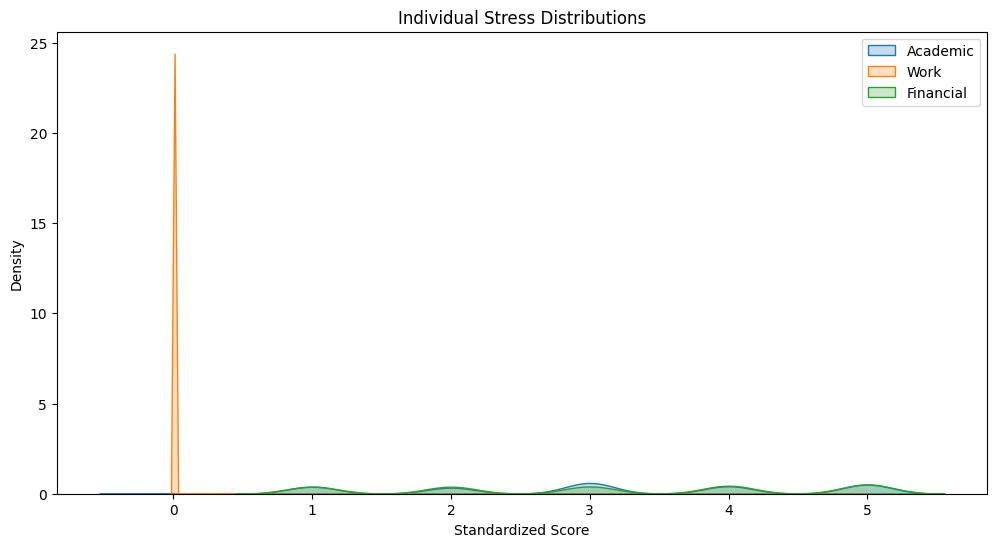

First 5 rows of the individual stress columns:
   Academic Pressure  Work Pressure  Financial Stress
0                5.0            0.0               1.0
1                2.0            0.0               2.0
2                3.0            0.0               1.0
3                3.0            0.0               5.0
4                4.0            0.0               1.0


In [4]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df_original, x='Academic Pressure', label='Academic', fill=True)
sns.kdeplot(data=df_original, x='Work Pressure', label='Work', fill=True)
sns.kdeplot(data=df_original, x='Financial Stress', label='Financial', fill=True)
plt.title('Individual Stress Distributions')
plt.xlabel('Standardized Score')
plt.legend()
plt.show()

# first 5 rows of the original data
print("First 5 rows of the individual stress columns:")
print(df_original[['Academic Pressure', 'Work Pressure', 'Financial Stress']].head())

In [7]:
df_original['stress_score'] = df_original['Academic Pressure'] + df_original['Work Pressure'] + df_original['Financial Stress']

print("'New stress_score' feature has been successfully created.")

# Display the head of the DataFrame
print("First 5 rows with the new 'stress_score' column:")
print(df_original[['Academic Pressure', 'Work Pressure', 'Financial Stress', 'stress_score']].head())

'New stress_score' feature has been successfully created.
First 5 rows with the new 'stress_score' column:
   Academic Pressure  Work Pressure  Financial Stress  stress_score
0                5.0            0.0               1.0           6.0
1                2.0            0.0               2.0           4.0
2                3.0            0.0               1.0           4.0
3                3.0            0.0               5.0           8.0
4                4.0            0.0               1.0           5.0


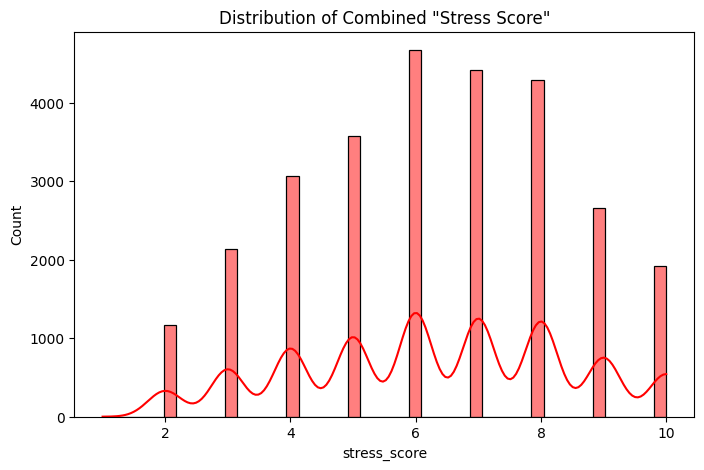

Descriptive Statistics for the new 'stress_score':
count    27898.000000
mean         6.281633
std          2.139239
min          1.000000
25%          5.000000
50%          6.000000
75%          8.000000
max         10.000000
Name: stress_score, dtype: float64


In [8]:
# Plot the histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df_original, x='stress_score', kde=True, color='red')
plt.title('Distribution of Combined "Stress Score"')
plt.show()

# Display summary statistics
print("Descriptive Statistics for the new 'stress_score':")
print(df_original['stress_score'].describe())